## Step-Wise Modeling using Train-Test_Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# make a list of new column names that will be better for modeling 
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78','Y1', 'Y2']

# read in the modeling data file and rename the columns
df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

f0        f1        f2        f3        f4        f5       f6  \
0 -0.01821 -0.010433 -0.018399 -0.018279 -2.896385 -0.024231 -0.02066   
1 -0.01821 -3.182200 -3.260786 -3.270119 -2.037297 -0.024231 -0.02066   

         f7        f8        f9 ...  f71  f72  f73  f74  f75  f76  f77  f78  \
0  4.079933 -1.414801 -3.011022 ...    0    0    0    0    0    0    0  9.0   
1  3.366161 -3.683655 -3.011022 ...    0    0    0    0    0    0    0  9.0   

   Y1  Y2  
0   0   0  
1   0   0  

[2 rows x 81 columns]

In [3]:
# double check the shape of the dataframe
df.shape

(52786, 81)

### Split and Resample Data before Modeling 

In [4]:
# Split data into features and target
# for this modeling approach I will only be using 1 target at a time
# the first target will be Y1 (ACCP)
X = df.iloc[:, :-2] # Features
Y = df.Y1 # Target

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the ACCP target 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Target: Y1 (ACCP)
### 1. Decicion Tree

In [5]:
# build Y1 decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# fit the model 
dt = dt.fit(X_train_resample,Y_train_resample)

# predict the target for the test data 
Y_pred = dt.predict(X_test)

In [6]:
# print F1 and AUC Scores for Y1 decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix for the Y1 decision tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9305969749472937
AUC Score: 0.9241090799170568
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5612
           1       0.95      0.95      0.95     10224

    accuracy                           0.93     15836
   macro avg       0.92      0.92      0.92     15836
weighted avg       0.93      0.93      0.93     15836

[[5061  551]
 [ 548 9676]]


Text(0.5, 12.5, 'Predicted label')

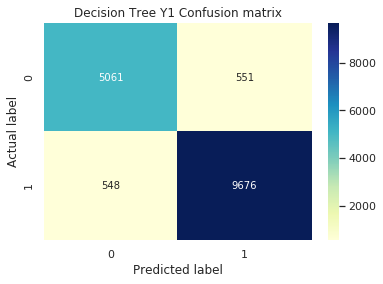

In [7]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Decision Tree Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Feature Importance Based on Decision Tree

In [8]:
# define the Y1 decision tree feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
feature_imp

f13    0.620670
f26    0.212213
f3     0.027494
f4     0.015373
f1     0.010536
f0     0.010456
f25    0.010141
f2     0.009621
f24    0.008610
f10    0.007009
f9     0.005989
f17    0.004251
f16    0.004244
f75    0.003323
f21    0.003283
f12    0.002744
f11    0.002651
f33    0.002556
f78    0.002204
f35    0.002197
f19    0.002160
f15    0.001876
f46    0.001732
f56    0.001690
f20    0.001647
f14    0.001616
f76    0.001529
f32    0.001457
f65    0.001449
f58    0.001340
         ...   
f60    0.000315
f43    0.000288
f36    0.000286
f54    0.000263
f23    0.000210
f61    0.000208
f72    0.000196
f62    0.000194
f69    0.000180
f50    0.000179
f64    0.000177
f67    0.000137
f47    0.000114
f59    0.000114
f57    0.000096
f73    0.000091
f39    0.000082
f66    0.000068
f42    0.000047
f53    0.000036
f28    0.000035
f29    0.000030
f68    0.000000
f70    0.000000
f71    0.000000
f22    0.000000
f6     0.000000
f5     0.000000
f44    0.000000
f48    0.000000
Length: 79, dtype: float

In [9]:
# save the Y1 decision tree feature importance results to a dataframe and csv file 
dffi = pd.DataFrame(feature_imp)
dffi.to_csv('feature_imp/sw_tt_dt.csv')

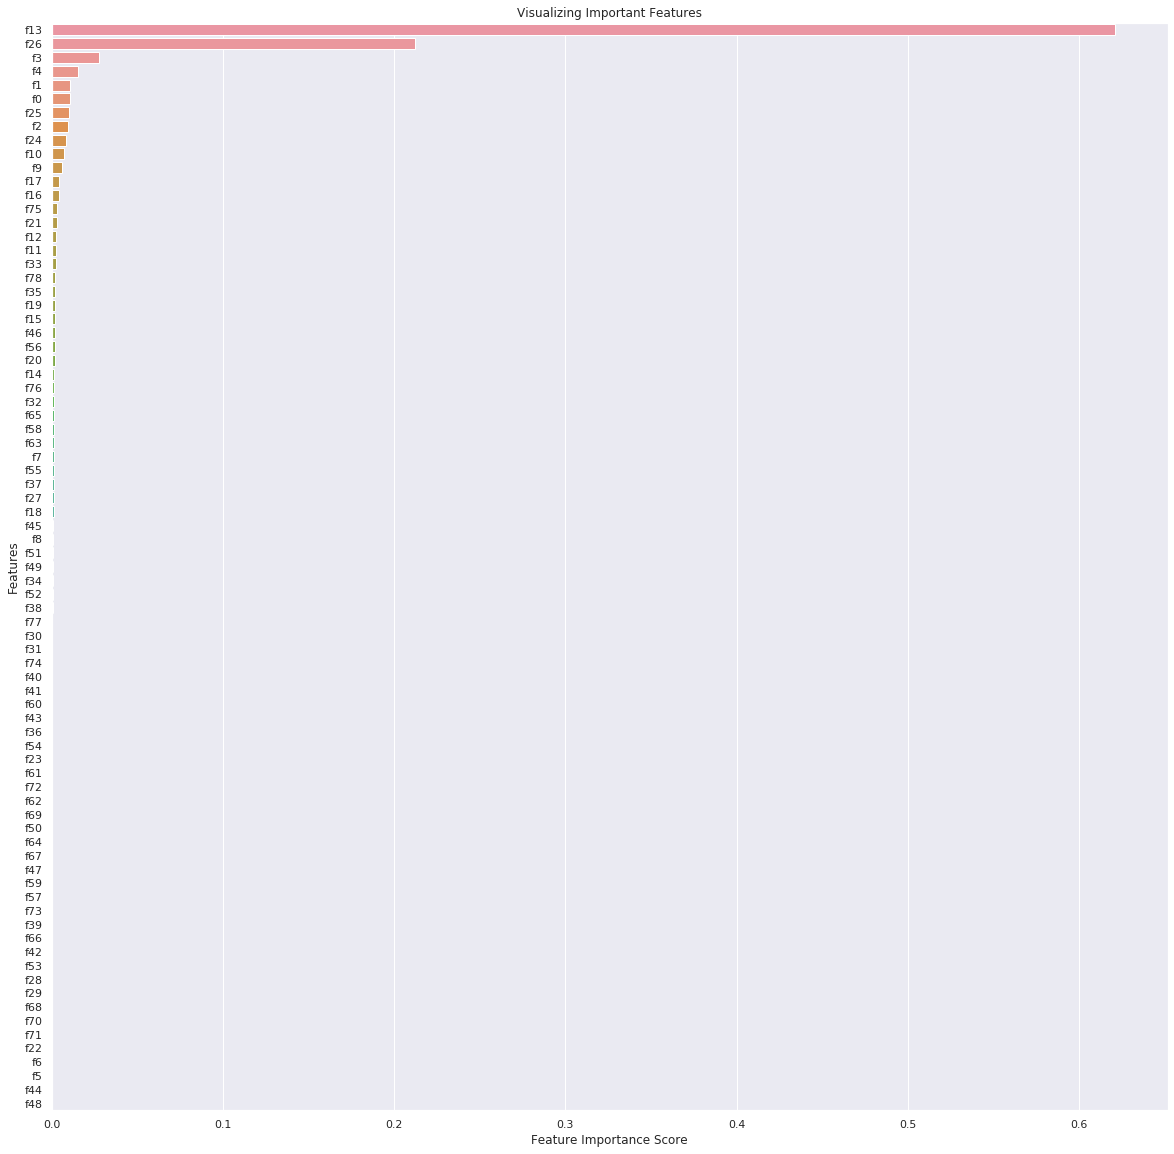

<Figure size 432x288 with 0 Axes>

In [10]:
# visualize the Y1 decision tree feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp.index, x=feature_imp)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/sw_tt_dty1_feature_importance.PNG')

### 2. Logistic Regression

In [11]:
# build  Y1 logistic regression
# specify a solver to aviod a warning message 
logreg = LogisticRegression(solver='liblinear',random_state=2019)

# fit the model
logreg = logreg.fit(X_train_resample,Y_train_resample) 

# predict using test data
Y_pred=logreg.predict(X_test)

In [12]:
# print F1 and AUC Scores for the logistic regression 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and the confusion matrix  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9383680111778925
AUC Score: 0.9400707125464437
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5612
           1       0.97      0.93      0.95     10224

    accuracy                           0.94     15836
   macro avg       0.93      0.94      0.93     15836
weighted avg       0.94      0.94      0.94     15836

[[5317  295]
 [ 688 9536]]


Text(0.5, 12.5, 'Predicted label')

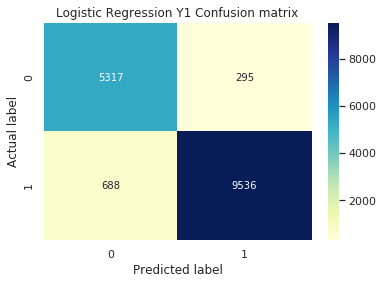

In [13]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Logistic Regression Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3. SVM

In [14]:
# define the Y1 svm model 
svc = SVC(kernel='rbf', gamma='auto', random_state=2019)

# fit svm model 
svc = svc.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = svc.predict(X_test)

In [15]:
# print the F1 and AUC Scores for the SVM model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9386640058703242
AUC Score: 0.9438258351486922
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      5612
           1       0.98      0.92      0.95     10224

    accuracy                           0.94     15836
   macro avg       0.93      0.94      0.93     15836
weighted avg       0.94      0.94      0.94     15836

[[5408  204]
 [ 777 9447]]


Text(0.5, 12.5, 'Predicted label')

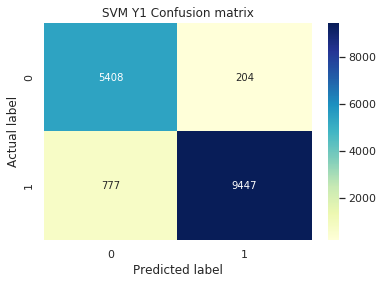

In [16]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('SVM Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 4. KNeighbors

In [17]:
# define the Y1 kneighborsclassifier model 
kn = KNeighborsClassifier()

# fit the model 
kn = kn.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = kn.predict(X_test)

In [18]:
# print the F1 and AUC Scores for the kneighborsclassifier
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9122656700379741
AUC Score: 0.9102904281235047
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5612
           1       0.95      0.92      0.93     10224

    accuracy                           0.91     15836
   macro avg       0.90      0.91      0.90     15836
weighted avg       0.91      0.91      0.91     15836

[[5081  531]
 [ 867 9357]]


Text(0.5, 12.5, 'Predicted label')

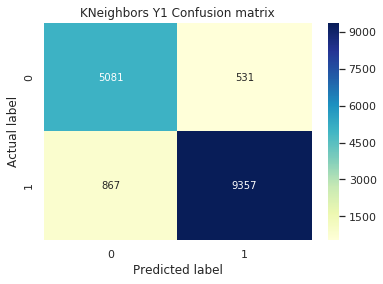

In [19]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('KNeighbors Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 5. AdaBoost

In [20]:
# define the Y1 adaboost model 
ada = AdaBoostClassifier(random_state=2019)

# fit the model 
ada = ada.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = ada.predict(X_test)

In [21]:
# print the F1 and AUC Scores for the adaboost model
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9418837304750196
AUC Score: 0.9480883379790902
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5612
           1       0.98      0.92      0.95     10224

    accuracy                           0.94     15836
   macro avg       0.93      0.95      0.94     15836
weighted avg       0.95      0.94      0.94     15836

[[5452  160]
 [ 770 9454]]


Text(0.5, 12.5, 'Predicted label')

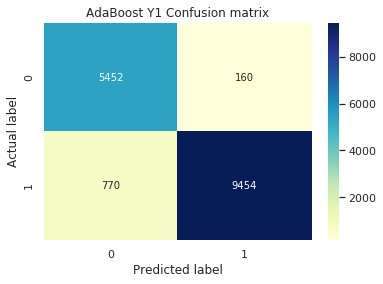

In [22]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('AdaBoost Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
# define the ada feature importance variable 
ada_feature_imp = pd.Series(ada.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
ada_feature_imp

f78    0.18
f26    0.16
f13    0.12
f23    0.10
f4     0.08
f3     0.06
f9     0.06
f17    0.04
f16    0.02
f34    0.02
f24    0.02
f55    0.02
f19    0.02
f18    0.02
f60    0.02
f58    0.02
f10    0.02
f2     0.02
f15    0.00
f25    0.00
f35    0.00
f1     0.00
f33    0.00
f32    0.00
f31    0.00
f30    0.00
f29    0.00
f28    0.00
f27    0.00
f5     0.00
       ... 
f67    0.00
f68    0.00
f69    0.00
f70    0.00
f71    0.00
f72    0.00
f73    0.00
f74    0.00
f75    0.00
f76    0.00
f61    0.00
f57    0.00
f77    0.00
f56    0.00
f40    0.00
f41    0.00
f42    0.00
f43    0.00
f44    0.00
f45    0.00
f46    0.00
f47    0.00
f48    0.00
f49    0.00
f50    0.00
f51    0.00
f52    0.00
f53    0.00
f54    0.00
f0     0.00
Length: 79, dtype: float64

In [24]:
# save the ada feature importance results as a dataframe and csv file 
ada_fi = pd.DataFrame(ada_feature_imp)
ada_fi.to_csv('feature_imp/sw_tt_ada.csv')

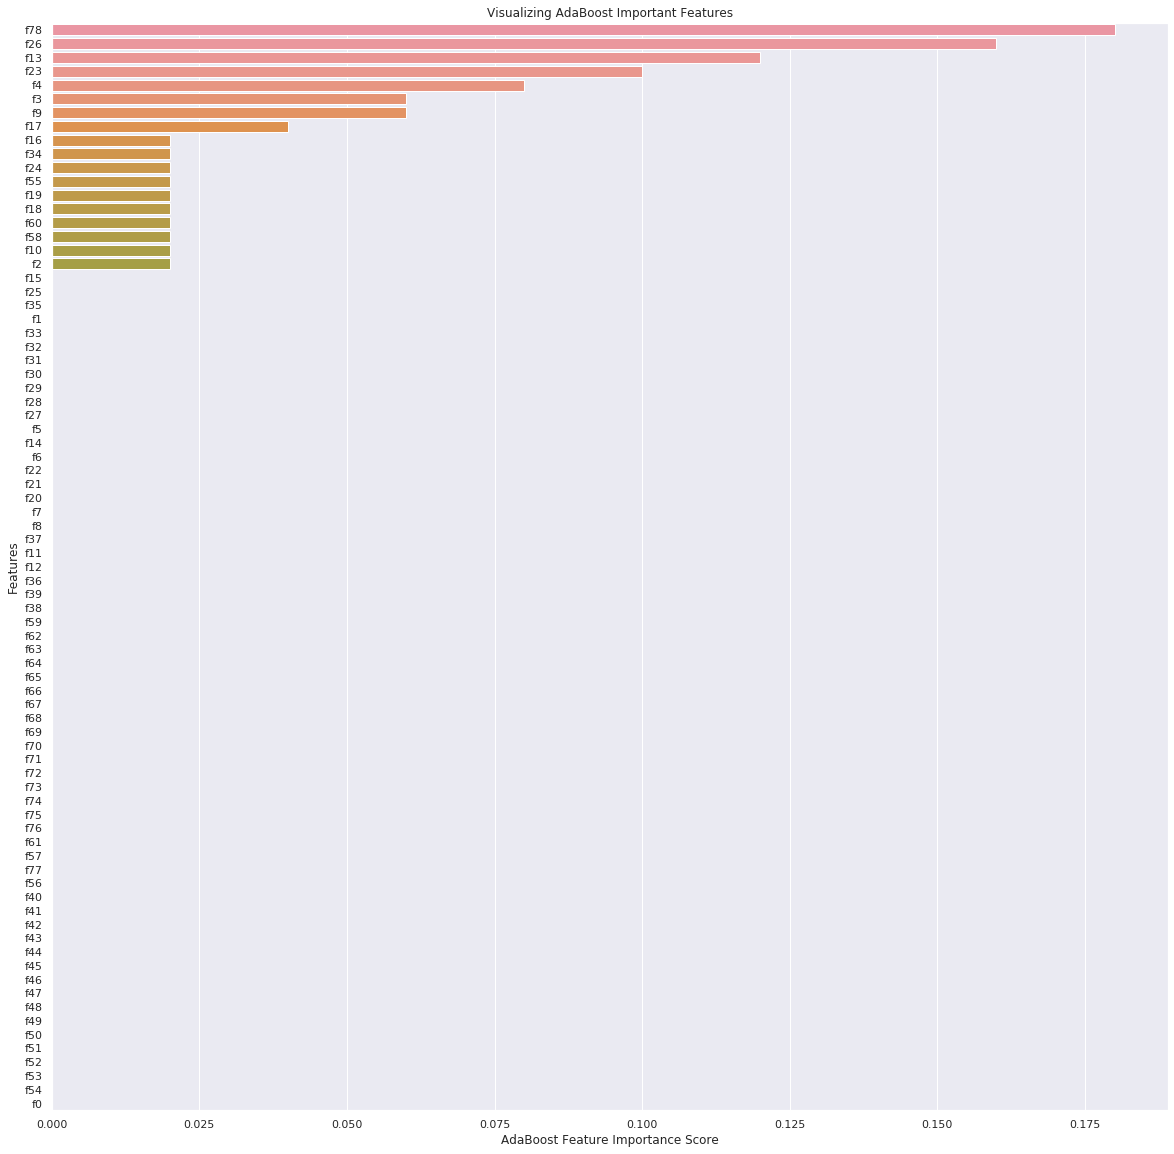

<Figure size 432x288 with 0 Axes>

In [25]:
# visualize the Y1 ada feature importance results 
plt.figure(figsize=(20,20))

# Create the plot
sns.barplot(y=ada_feature_imp.index, x=ada_feature_imp)

# Add labels & title 
plt.xlabel('AdaBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing AdaBoost Important Features")
plt.show()

# save the figure as a png file 
plt.savefig('images/sw_tt_aday1_feature_importance.PNG')

### 6. XGBoost

In [26]:
# build Y1 xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=xg.predict(X_test)

In [27]:
# print F1 and AUC scores for the Y1 xgboost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9467068476395548
AUC Score: 0.9521440335208368
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5612
           1       0.98      0.93      0.96     10224

    accuracy                           0.95     15836
   macro avg       0.94      0.95      0.94     15836
weighted avg       0.95      0.95      0.95     15836

[[5458  154]
 [ 698 9526]]


Text(0.5, 12.5, 'Predicted label')

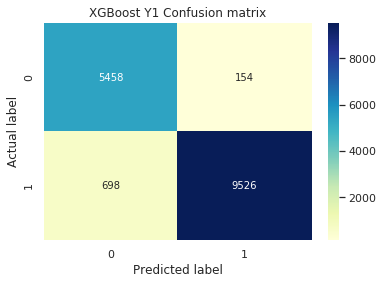

In [28]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('XGBoost Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
# define the Y1 xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp

f13    0.664846
f26    0.162030
f23    0.032770
f3     0.023574
f60    0.019460
f16    0.010124
f10    0.008907
f2     0.008109
f78    0.008104
f12    0.007356
f9     0.006982
f17    0.006293
f1     0.005215
f21    0.004960
f58    0.002943
f25    0.002830
f11    0.002654
f0     0.002496
f76    0.002337
f18    0.001996
f24    0.001963
f4     0.001885
f49    0.001665
f35    0.001516
f52    0.001328
f14    0.001257
f32    0.001105
f55    0.001024
f7     0.000939
f75    0.000808
         ...   
f5     0.000000
f74    0.000000
f64    0.000000
f30    0.000000
f27    0.000000
f28    0.000000
f62    0.000000
f57    0.000000
f56    0.000000
f54    0.000000
f53    0.000000
f51    0.000000
f50    0.000000
f48    0.000000
f47    0.000000
f46    0.000000
f45    0.000000
f44    0.000000
f43    0.000000
f42    0.000000
f41    0.000000
f40    0.000000
f77    0.000000
f38    0.000000
f37    0.000000
f36    0.000000
f31    0.000000
f59    0.000000
f29    0.000000
f39    0.000000
Length: 79, dtype: float

In [30]:
# save the Y1 xgboost feature importance results as a dataframe and csv file 
dfi_xg = pd.DataFrame(xgb_feature_imp)
dfi_xg.to_csv('feature_imp/sw_tt_xgb.csv')

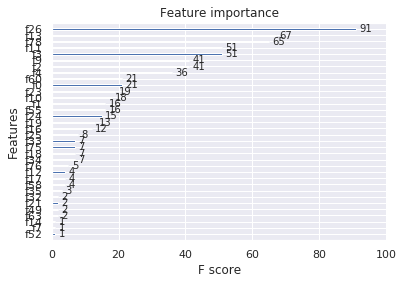

<Figure size 1440x720 with 0 Axes>

In [31]:
# visualize the Y1 xgboost feature importances according to the xgboost model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()
plt.savefig('images/sw_tt_xgby1_feature_importance.PNG')

### 7. Random Forest: ACCP (Y1)

In [32]:
# build the Y1 random forest model  
rfy1 = RandomForestClassifier(n_estimators=100, random_state=2019)

# fit the model 
rfy1 = rfy1.fit(X_train_resample, Y_train_resample)

# Predict the target for the test data 
Y_pred = rfy1.predict(X_test)

In [33]:
# print the F1 and AUC scores for the Y1 random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9469998748223369
AUC Score: 0.9452380713360705
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5612
           1       0.97      0.95      0.96     10224

    accuracy                           0.95     15836
   macro avg       0.94      0.95      0.94     15836
weighted avg       0.95      0.95      0.95     15836

[[5274  338]
 [ 504 9720]]


Text(0.5, 12.5, 'Predicted label')

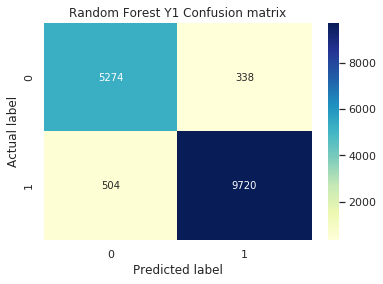

In [34]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Random Forest Y1 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
# define the Y1 random forest feature importance variable
rfy1_feature_imp = pd.Series(rfy1.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
rfy1_feature_imp

f13    0.375843
f78    0.141014
f4     0.091111
f26    0.054975
f3     0.041556
f2     0.037327
f1     0.034506
f0     0.024148
f23    0.020824
f10    0.017345
f15    0.016816
f24    0.012960
f25    0.012629
f9     0.011966
f12    0.011127
f60    0.010820
f17    0.010622
f16    0.009120
f11    0.005547
f7     0.004964
f21    0.004957
f19    0.003499
f8     0.003269
f75    0.003065
f20    0.002738
f33    0.002716
f18    0.002634
f65    0.002232
f32    0.001995
f14    0.001776
         ...   
f34    0.000501
f41    0.000498
f54    0.000493
f31    0.000474
f77    0.000471
f57    0.000402
f73    0.000368
f69    0.000271
f72    0.000260
f62    0.000184
f64    0.000178
f71    0.000173
f39    0.000167
f47    0.000160
f50    0.000157
f61    0.000149
f59    0.000139
f29    0.000130
f67    0.000119
f42    0.000109
f44    0.000094
f66    0.000090
f28    0.000070
f70    0.000059
f53    0.000058
f68    0.000029
f48    0.000008
f5     0.000000
f6     0.000000
f22    0.000000
Length: 79, dtype: float

In [36]:
# save the results to a dataframe and csv file 
dfi_rfy1 = pd.DataFrame(rfy1_feature_imp)
dfi_rfy1.to_csv('feature_imp/sw_tt_rfy1.csv')

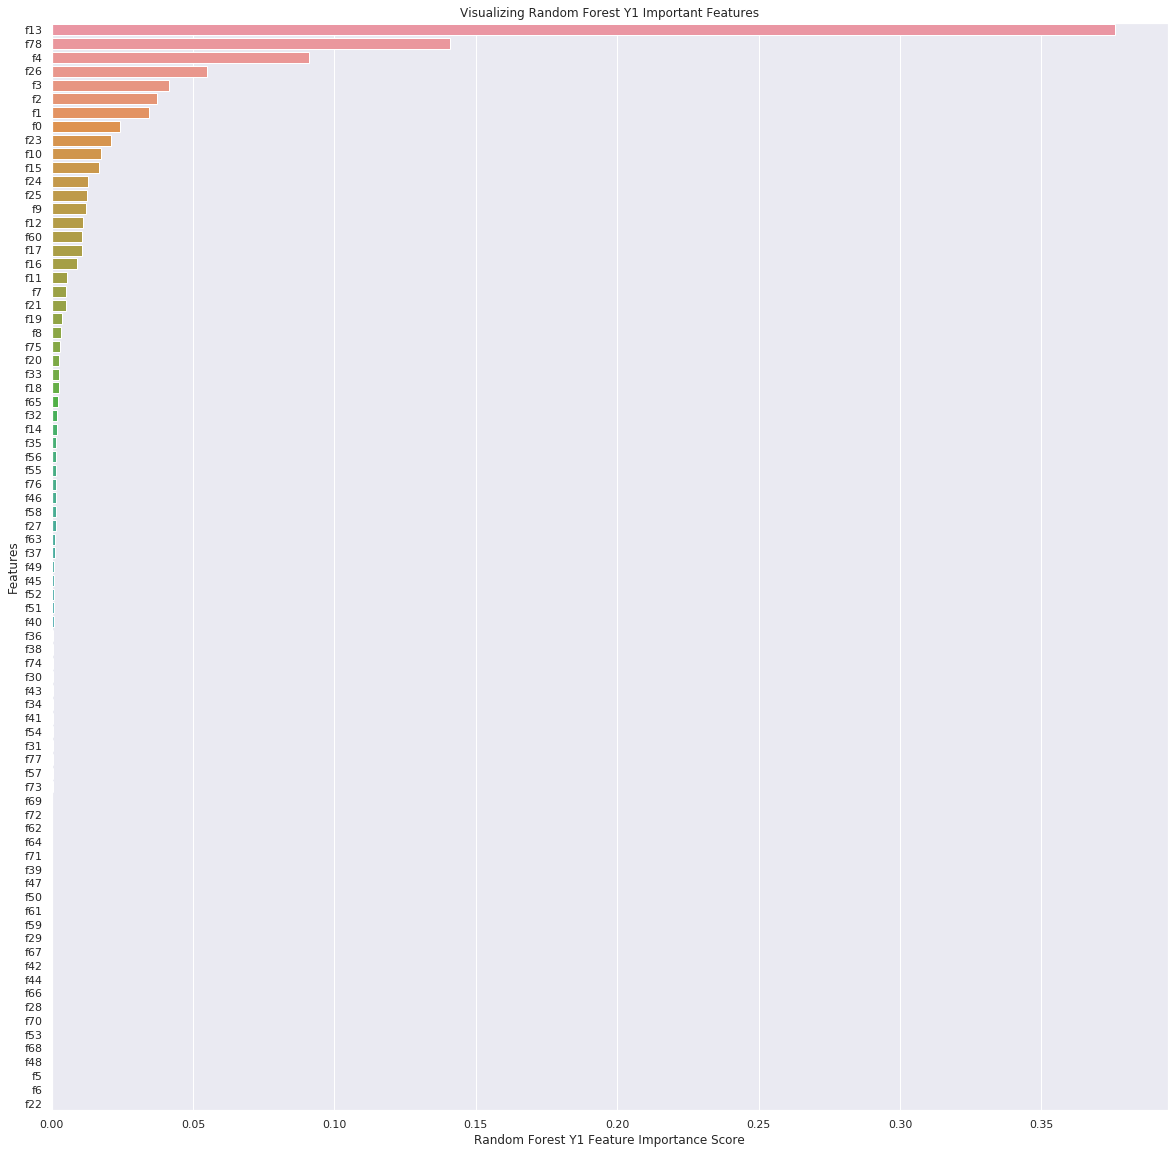

<Figure size 1440x720 with 0 Axes>

In [37]:
# visualize the Y1 random forest feature importance values 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rfy1_feature_imp.index, x=rfy1_feature_imp)

# Add labels & title
plt.xlabel('Random Forest Y1 Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Y1 Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/sw_tt_rfy1_feature_importance.PNG')

## Step-Wise Modeling: CONF

In [38]:
# filter out the students that were not accepted (where ACCP=0)
df = df[df.Y1 != 0]
df.head(2)

f0        f1        f2        f3        f4        f5       f6  \
48  0.649921 -0.010433 -0.018399 -0.018279  0.029160 -0.024231 -0.02066   
67 -0.018210 -0.010433 -0.018399 -0.018279 -0.156589 -0.024231 -0.02066   

          f7        f8        f9 ...  f71  f72  f73  f74  f75  f76  f77  f78  \
48  0.968218 -3.701231 -3.011022 ...    0    0    0    0    0    0    0  5.0   
67  2.848948 -2.593895 -3.011022 ...    0    0    0    0    0    0    0  5.0   

    Y1  Y2  
48   1   0  
67   1   0  

[2 rows x 81 columns]

### Re-Split and Re-Balance the Data

In [39]:
# Split data into features and target
# the second target is Y2 (CONF)
X = df.iloc[:, :-2] # Features
Y = df.Y2 # Target

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the ACCP target 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

### 1. Decision Tree

In [40]:
# build Y2 decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# fit model 
dt = dt.fit(X_train_resample,Y_train_resample)

# predict the target for the test data 
Y_pred = dt.predict(X_test)

In [41]:
# print F1 and AUC scores for the Y2 decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix   
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7646020405642995
AUC Score: 0.5465709004101271
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8696
           1       0.22      0.25      0.23      1491

    accuracy                           0.76     10187
   macro avg       0.54      0.55      0.54     10187
weighted avg       0.77      0.76      0.76     10187

[[7348 1348]
 [1121  370]]


Text(0.5, 12.5, 'Predicted label')

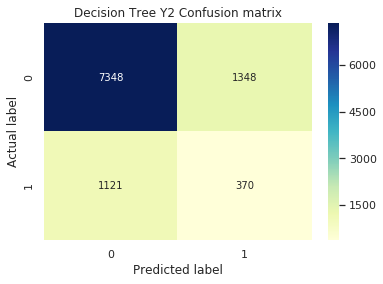

In [42]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Decision Tree Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
# define the Y2 decision tree feature importance variable 
feature_imp_conf = pd.Series(dt.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
feature_imp_conf

f4     0.206898
f78    0.068890
f3     0.064683
f1     0.057224
f0     0.056951
f2     0.054284
f25    0.044768
f24    0.041005
f12    0.026683
f9     0.024744
f8     0.023747
f17    0.021275
f10    0.020418
f26    0.020025
f21    0.019679
f75    0.018082
f7     0.017307
f16    0.015461
f11    0.015375
f32    0.014046
f33    0.010765
f19    0.010173
f27    0.009062
f65    0.008682
f60    0.008317
f20    0.008230
f56    0.008120
f46    0.008091
f35    0.006577
f15    0.006416
         ...   
f31    0.002046
f50    0.001585
f38    0.001520
f74    0.001343
f54    0.001306
f44    0.001270
f71    0.001207
f64    0.001058
f47    0.000976
f69    0.000890
f70    0.000686
f36    0.000656
f73    0.000531
f72    0.000482
f62    0.000398
f77    0.000393
f42    0.000342
f39    0.000328
f67    0.000284
f29    0.000254
f59    0.000206
f53    0.000160
f66    0.000080
f28    0.000044
f61    0.000000
f6     0.000000
f5     0.000000
f48    0.000000
f68    0.000000
f22    0.000000
Length: 79, dtype: float

In [44]:
# save the results to a dataframe and csv file 
dfi_dt = pd.DataFrame(feature_imp)
dfi_dt.to_csv('feature_imp/sw_tt_dty2.csv')

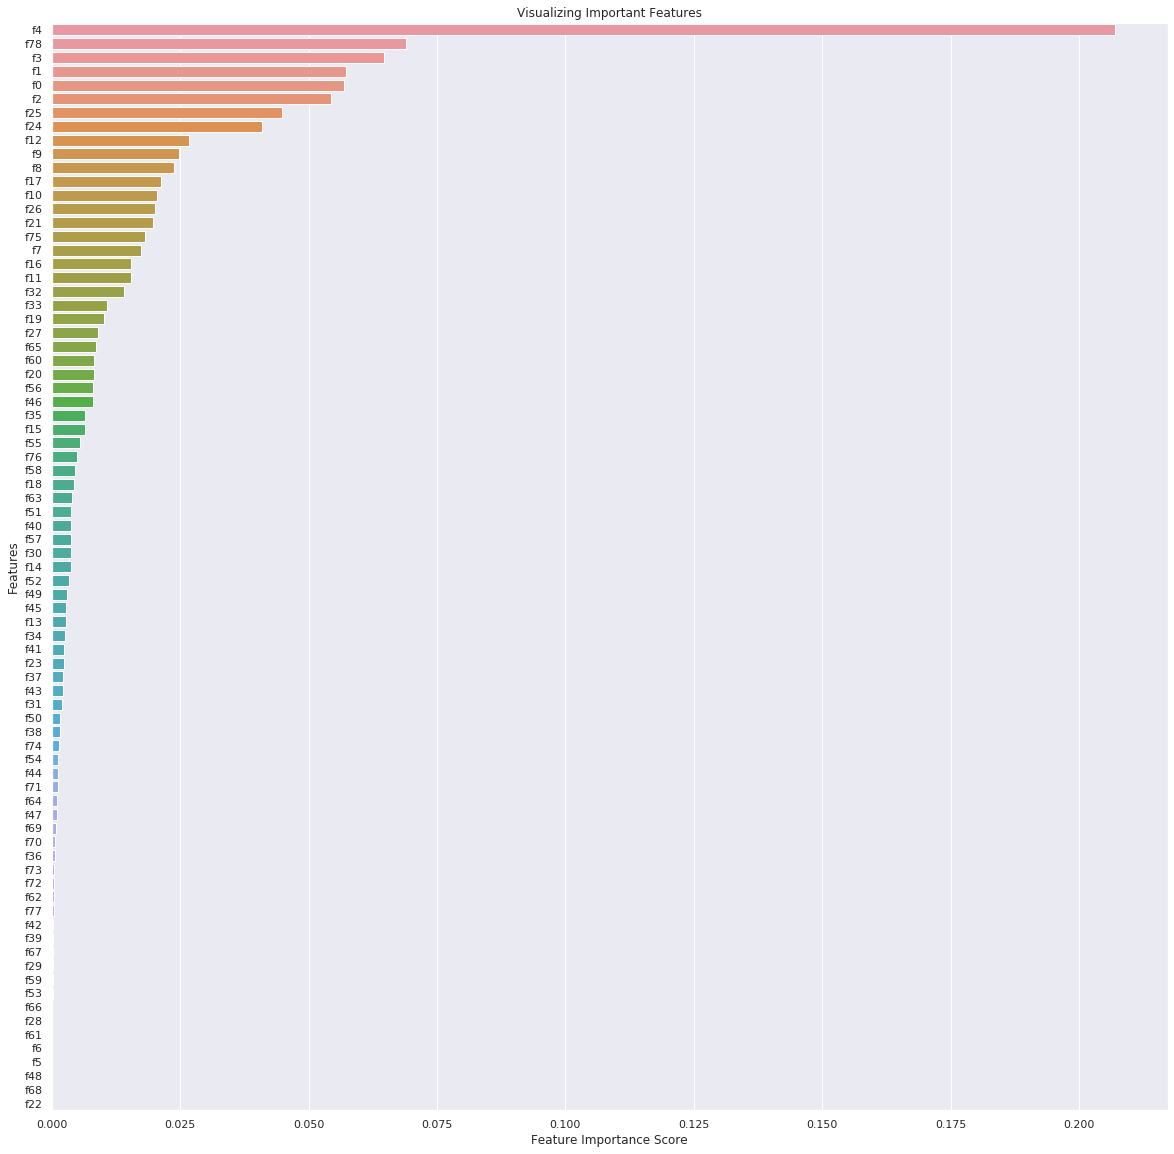

<Figure size 1440x720 with 0 Axes>

In [45]:
# visualize the Y2 decision tree feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp_conf.index, x=feature_imp_conf)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure to png file 
plt.savefig('images/sw_tt_dty2_feature_importance.PNG')

### 2. Logistic Regression

In [46]:
# build Y2 logistic regression
# specify a solver to aviod a warning message 
logreg = LogisticRegression(solver='liblinear',random_state=2019)

# fit the model
logreg = logreg.fit(X_train_resample,Y_train_resample) 

# predict target using test data 
Y_pred=logreg.predict(X_test)

In [47]:
# print F1 and AUC Scores for Y2 logistic regression 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.6893017734635529
AUC Score: 0.6157786183522478
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      8696
           1       0.22      0.59      0.32      1491

    accuracy                           0.64     10187
   macro avg       0.56      0.62      0.54     10187
weighted avg       0.80      0.64      0.69     10187

[[5618 3078]
 [ 618  873]]


Text(0.5, 12.5, 'Predicted label')

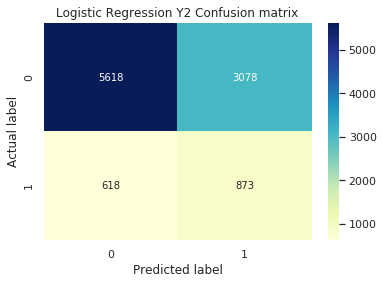

In [48]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Logistic Regression Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3. SVM

In [49]:
# define the Y2 svm model 
svc = SVC(kernel='rbf', gamma='auto', random_state=2019)

# fit svm model 
svc = svc.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = svc.predict(X_test)

In [50]:
# print F1 and AUC scores for the Y2 svm model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.709779318542164
AUC Score: 0.6233986254231924
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      8696
           1       0.23      0.57      0.33      1491

    accuracy                           0.66     10187
   macro avg       0.57      0.62      0.55     10187
weighted avg       0.80      0.66      0.71     10187

[[5908 2788]
 [ 645  846]]


Text(0.5, 12.5, 'Predicted label')

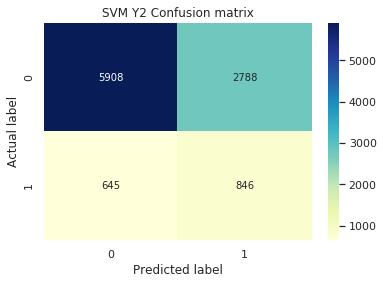

In [51]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('SVM Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 4. KNeighbors

In [52]:
# define the Y2 kneighborsclassifier model 
kn = KNeighborsClassifier()

# fit the model 
kn = kn.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = kn.predict(X_test)

In [53]:
# print F1 and AUC scores for the kneighborsclassifier model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.6878289711023273
AUC Score: 0.5531864523541125
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      8696
           1       0.19      0.43      0.26      1491

    accuracy                           0.64     10187
   macro avg       0.53      0.55      0.51     10187
weighted avg       0.77      0.64      0.69     10187

[[5865 2831]
 [ 847  644]]


Text(0.5, 12.5, 'Predicted label')

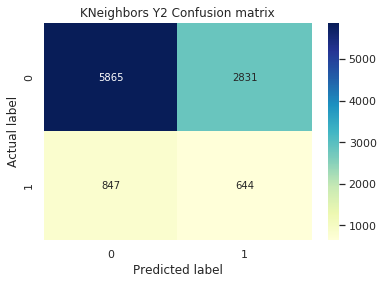

In [54]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('KNeighbors Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 5. AdaBoost

In [55]:
# define the Y2 adaboost model 
ada = AdaBoostClassifier(random_state=2019)

# fit the model 
ada = ada.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = ada.predict(X_test)

In [56]:
# print F1 and AUC scores for the Y2 adabost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.6873724528663828
AUC Score: 0.6113998464876965
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      8696
           1       0.22      0.58      0.32      1491

    accuracy                           0.63     10187
   macro avg       0.56      0.61      0.53     10187
weighted avg       0.80      0.63      0.69     10187

[[5606 3090]
 [ 629  862]]


Text(0.5, 12.5, 'Predicted label')

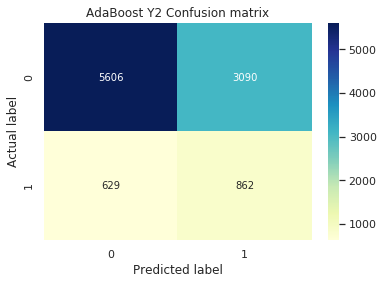

In [57]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('AdaBoost Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
# define the Y2 adaboost feature importance variable 
ada_feature_imp = pd.Series(ada.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
ada_feature_imp

f26    0.16
f78    0.10
f3     0.08
f4     0.06
f0     0.06
f16    0.04
f2     0.04
f9     0.04
f10    0.04
f19    0.02
f37    0.02
f25    0.02
f24    0.02
f21    0.02
f20    0.02
f36    0.02
f18    0.02
f77    0.02
f11    0.02
f8     0.02
f7     0.02
f1     0.02
f38    0.02
f39    0.02
f70    0.02
f60    0.02
f62    0.02
f63    0.02
f54    0.00
f13    0.00
       ... 
f71    0.00
f58    0.00
f27    0.00
f53    0.00
f41    0.00
f52    0.00
f51    0.00
f50    0.00
f49    0.00
f48    0.00
f47    0.00
f46    0.00
f45    0.00
f44    0.00
f43    0.00
f42    0.00
f40    0.00
f28    0.00
f55    0.00
f56    0.00
f57    0.00
f72    0.00
f35    0.00
f34    0.00
f33    0.00
f32    0.00
f31    0.00
f30    0.00
f29    0.00
f73    0.00
Length: 79, dtype: float64

In [59]:
# save the results to a dataframe and csv file 
dfi_ada = pd.DataFrame(ada_feature_imp)
dfi_ada.to_csv('feature_imp/sw_tt_aday2.csv')

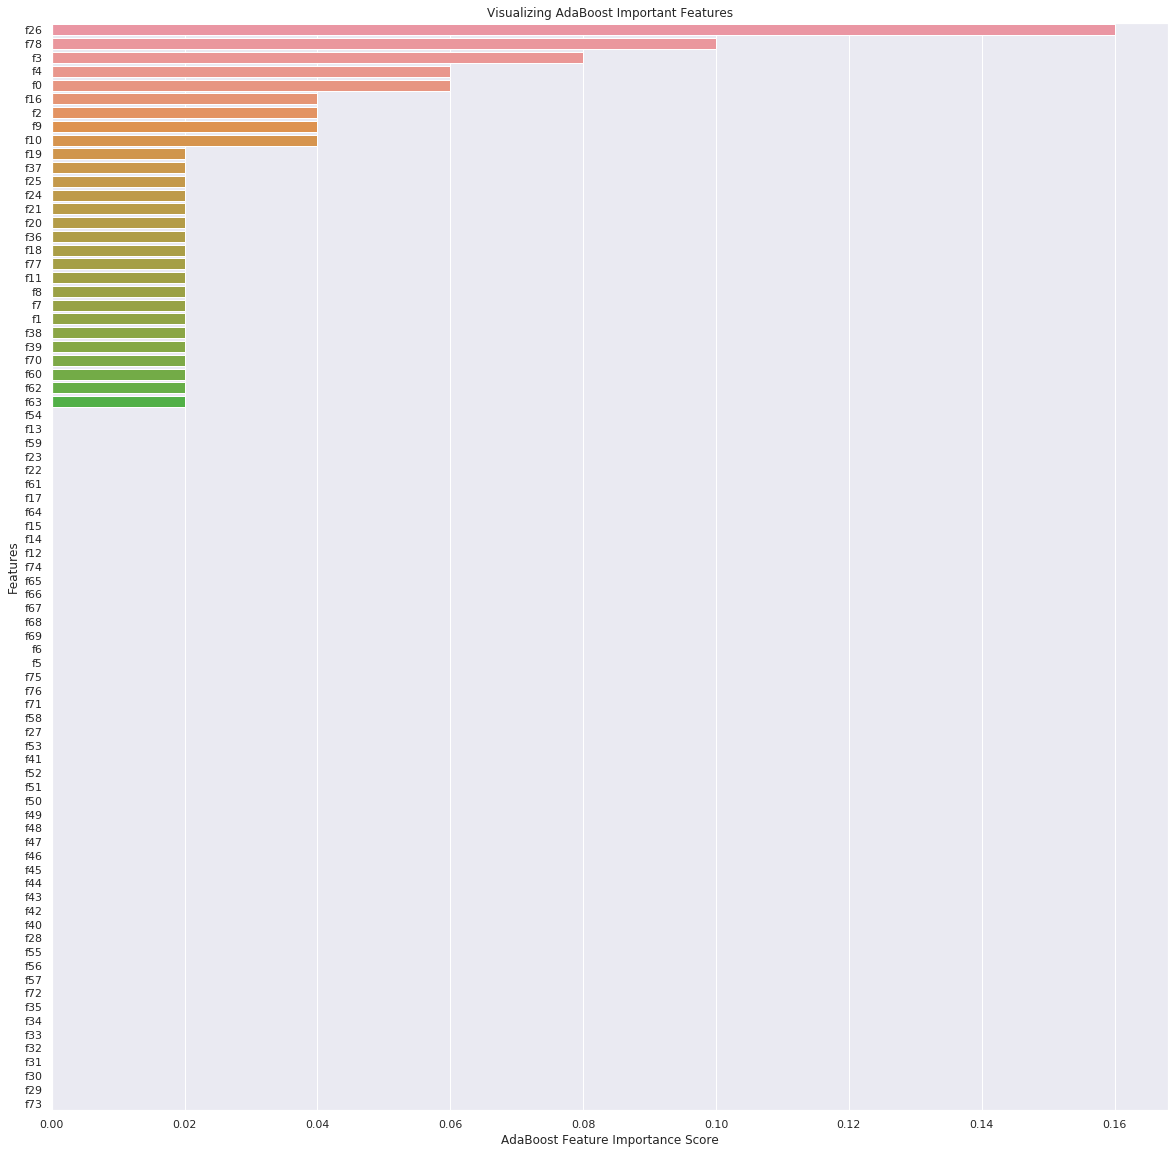

<Figure size 1440x720 with 0 Axes>

In [60]:
# visualize the Y2 adaboost feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=ada_feature_imp.index, x=ada_feature_imp)

# Add labels & title 
plt.xlabel('AdaBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing AdaBoost Important Features")
plt.show()

# svae figure to a png file 
plt.savefig('images/sw_tt_aday2_feature_importance.PNG')

### 6. XGBoost

In [61]:
# build Y2 xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# predict target 
Y_pred=xg.predict(X_test)

In [62]:
# print F1 and AUC scores for the Y2 xgboost model
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7065513558324499
AUC Score: 0.6204855243080686
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      8696
           1       0.23      0.57      0.33      1491

    accuracy                           0.66     10187
   macro avg       0.57      0.62      0.55     10187
weighted avg       0.80      0.66      0.71     10187

[[5869 2827]
 [ 647  844]]


Text(0.5, 12.5, 'Predicted label')

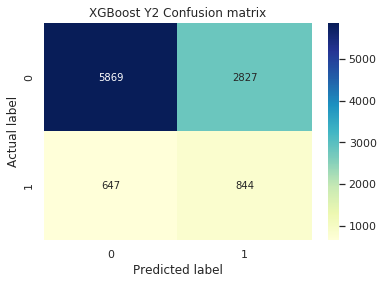

In [63]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('XGBoost Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
# define the Y2 xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp

f21    0.103421
f78    0.085905
f60    0.058796
f0     0.048430
f26    0.042163
f3     0.038388
f20    0.037253
f10    0.036865
f11    0.035403
f16    0.026275
f13    0.025389
f25    0.023053
f24    0.022952
f38    0.017414
f4     0.016639
f75    0.016089
f33    0.016077
f36    0.014162
f37    0.013953
f18    0.013623
f63    0.013573
f9     0.013470
f7     0.013321
f1     0.013231
f14    0.012290
f52    0.012090
f27    0.012064
f62    0.012020
f8     0.011790
f51    0.011743
         ...   
f55    0.002533
f40    0.001073
f61    0.000000
f72    0.000000
f71    0.000000
f70    0.000000
f69    0.000000
f5     0.000000
f6     0.000000
f68    0.000000
f67    0.000000
f66    0.000000
f73    0.000000
f64    0.000000
f41    0.000000
f45    0.000000
f59    0.000000
f29    0.000000
f44    0.000000
f31    0.000000
f54    0.000000
f76    0.000000
f22    0.000000
f23    0.000000
f53    0.000000
f50    0.000000
f48    0.000000
f47    0.000000
f28    0.000000
f15    0.000000
Length: 79, dtype: float

In [65]:
# save the results to a dataframe and csv file
dfi_xgb = pd.DataFrame(xgb_feature_imp)
dfi_xg.to_csv('feature_imp/sw_tt_xbgy2.csv')

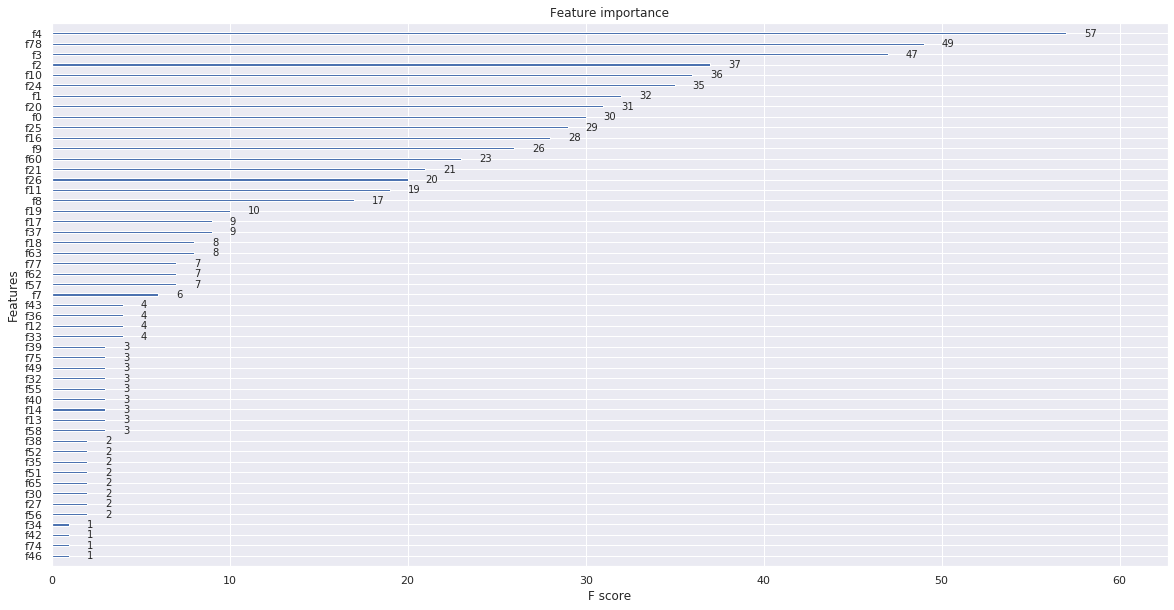

<Figure size 1440x720 with 0 Axes>

In [66]:
# visualize the Y2 xgboost feature importances 
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()
plt.savefig('images/sw_tt_xgby2_feature_importance.PNG')

### 7. Random Forest: CONF (Y2)

In [67]:
# build Y2 random forest model 
rfy2 = RandomForestClassifier(n_estimators=100, random_state=2019)

# fit model
rfy2 = rfy2.fit(X_train_resample, Y_train_resample)

# predict target 
Y_pred = rfy2.predict(X_test)

In [68]:
# print F1 and AUC scores for the Y2 random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8029162439941496
AUC Score: 0.5629908321440449
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8696
           1       0.32      0.20      0.24      1491

    accuracy                           0.82     10187
   macro avg       0.60      0.56      0.57     10187
weighted avg       0.79      0.82      0.80     10187

[[8071  625]
 [1196  295]]


Text(0.5, 12.5, 'Predicted label')

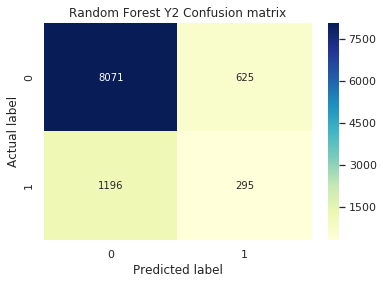

In [69]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Random Forest Y2 Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
# define the Y2 random forest feature importance variable
rfy2_feature_imp = pd.Series(rfy2.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
rfy2_feature_imp

f4     0.183389
f3     0.066786
f78    0.064912
f1     0.062129
f0     0.060591
f2     0.060472
f25    0.045609
f24    0.044811
f12    0.027844
f9     0.026057
f10    0.023406
f8     0.023332
f17    0.022735
f16    0.021830
f7     0.020989
f11    0.019570
f26    0.018624
f21    0.017974
f19    0.012995
f75    0.011515
f33    0.009644
f32    0.008909
f20    0.008691
f65    0.008161
f46    0.007008
f56    0.006902
f13    0.006640
f60    0.006597
f27    0.006588
f15    0.006476
         ...   
f43    0.002017
f41    0.001536
f36    0.001442
f50    0.001190
f74    0.001176
f69    0.001151
f54    0.001122
f64    0.001019
f44    0.000950
f42    0.000885
f71    0.000848
f62    0.000799
f73    0.000782
f72    0.000678
f67    0.000657
f70    0.000640
f47    0.000571
f39    0.000521
f77    0.000399
f59    0.000393
f28    0.000371
f61    0.000237
f68    0.000203
f66    0.000195
f29    0.000169
f53    0.000166
f48    0.000018
f6     0.000000
f5     0.000000
f22    0.000000
Length: 79, dtype: float

In [71]:
# save the results to a dataframe and csv file 
dfi_rf = pd.DataFrame(rfy2_feature_imp)
dfi_rf.to_csv('feature_imp/sw_tt_rfy2.csv')

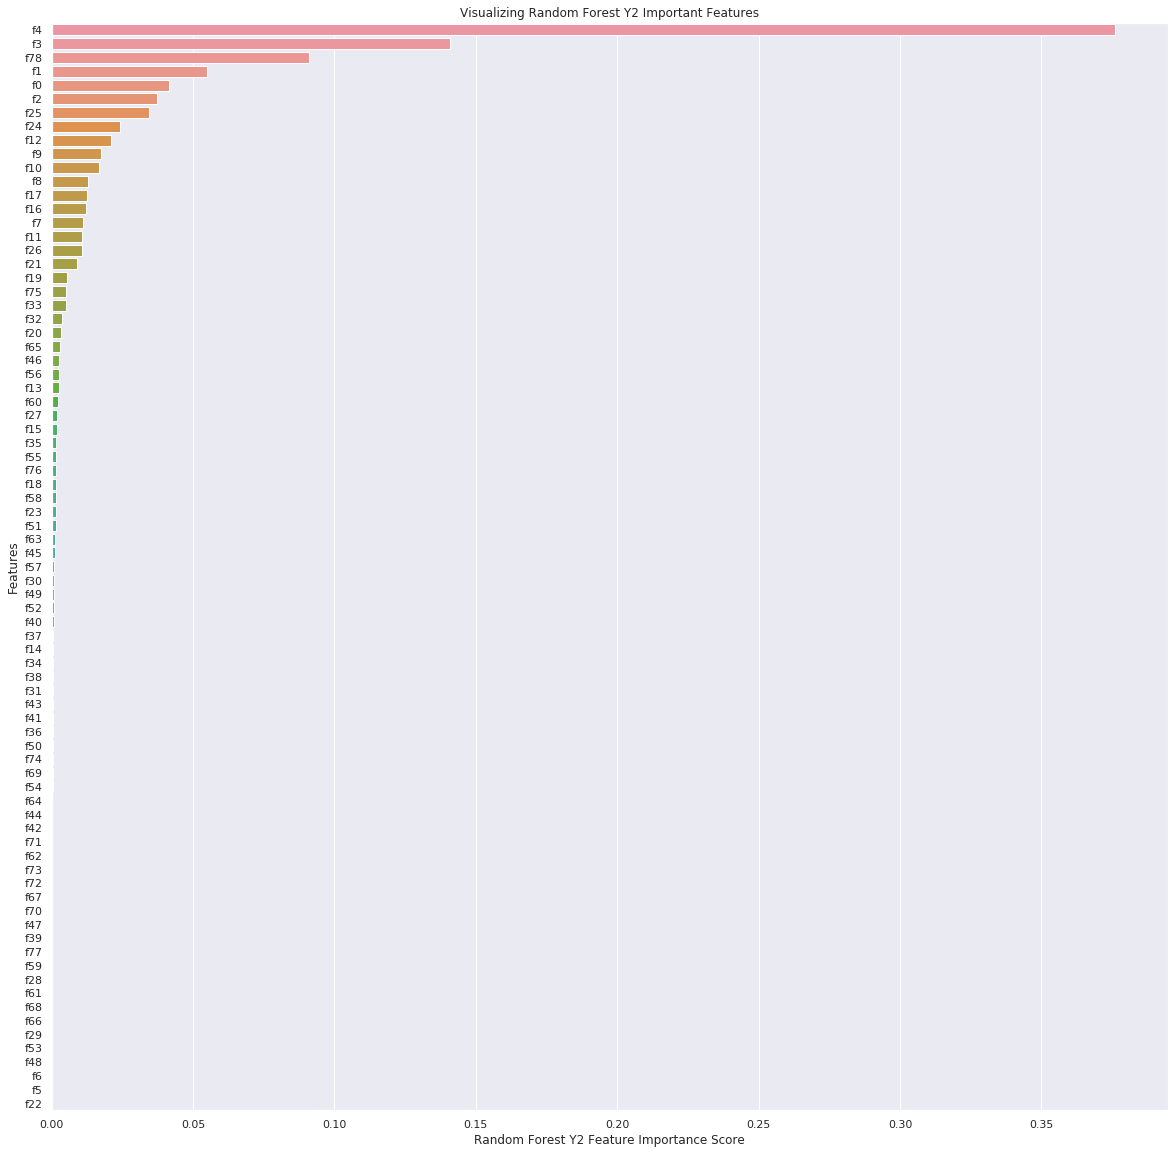

<Figure size 1440x720 with 0 Axes>

In [72]:
# visualize the Y2 random forest feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rfy2_feature_imp.index, x=rfy1_feature_imp)

# Add labels & title
plt.xlabel('Random Forest Y2 Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Y2 Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/sw_tt_rfy2_feature_importance.PNG')